# Network-level changes in the brain underlie fear memory strength
Josue Haubrich & Karim Nader 
eLife, 2023 https://doi.org/10.7554/eLife.88172.3

### Conversion of the R code from:
- [https://github.com/johaubrich/Networks/](https://github.com/johaubrich/Networks/)

### Using the provided data:
- [https://datadryad.org/stash/dataset/doi:10.5061/dryad.280gb5mw3](https://datadryad.org/stash/dataset/doi:10.5061/dryad.280gb5mw3)
- JHelife2023_Fig2.csv

### To reproduce plots from:

- Fig 3A
- Fig 4



In [1]:
import numpy as np
import pandas as pd
import networkx as nx
from scipy.stats import pearsonr, spearmanr, kruskal, wilcoxon
from statsmodels.stats.multitest import multipletests
from sklearn.utils import resample
import statsmodels.api as sm
from scipy.spatial.distance import jaccard
import community as community_louvain
from scipy.spatial import ConvexHull


In [2]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import seaborn as sns
from matplotlib.lines import Line2D
from matplotlib.patches import Circle
from matplotlib import gridspec

from functional_networks import *



In [3]:

path = 'Z://Collaboration_data/Iordanova_lab/nader_lab_network_data/'
file = 'JHelife2023_Fig2.csv'


In [4]:

df = pd.read_csv(path+file)
display(df)

,Group,Freezing,CA1,CA3,DG,BLA,CeA,PV,PL,IL,Re,Cg1,Cg2,RSC
0,NS,0.000000,63.716814,47.761194,116.363636,94.915254,50.450450,80.695652,136.035095,82.117593,53.150164,109.941520,100.000000,121.841920
1,2S,62.033333,141.592920,155.223881,101.818182,189.830508,235.435435,154.434783,117.807580,143.724409,267.965409,118.713450,133.766234,146.591060
2,2S,69.100000,70.796460,71.641791,81.818182,171.751412,211.891892,178.086957,131.053142,110.942240,194.883934,199.415205,287.012987,128.505150
3,10S,87.783333,102.654867,149.253731,69.090909,198.870056,376.276276,189.217391,83.414305,72.147407,106.300327,146.198830,199.350649,95.189000
4,NS,10.945833,127.433628,161.194030,101.818182,126.553672,106.506507,154.434783,85.423775,110.147065,128.446229,83.625731,125.974026,91.207896
5,10S,91.216667,109.734513,191.044776,112.727273,187.570621,317.837838,200.347826,145.382399,97.598265,210.386065,92.397661,124.675325,136.811845
6,10S,68.770833,127.433628,155.223881,80.000000,185.310734,302.702703,208.695652,134.586472,134.872813,124.017049,101.754386,146.753247,127.063614
7,2S,47.312500,194.690265,161.194030,109.090909,131.073446,210.210210,144.695652,130.692114,131.650344,148.377540,105.263158,114.285714,178.268353
8,NS,0.000000,95.575221,83.582090,87.272727,103.954802,105.705706,72.347826,99.428866,106.247637,94.862173,110.526316,66.883117,110.943603
9,2S,58.895833,141.592920,107.462687,65.454545,144.632768,221.021021,178.789286,131.840721,109.082023,158.838987,101.754386,120.779221,128.960085


# Data Analysis


In [5]:
df_ns = df[df['Group'] == "NS"].drop(columns=[ 'Group', 'Freezing'])
df_2s = df[df['Group'] == "2S"].drop(columns=[ 'Group', 'Freezing'])
df_10s = df[df['Group'] == "10S"].drop(columns=[ 'Group', 'Freezing'])

In [6]:
cmatrix_ns_unthresh = corr_matrix_threshold(df_ns, thresh=-1, thresh_param='r', negs=True)
cmatrix_2s_unthresh = corr_matrix_threshold(df_2s, thresh=-1, thresh_param='r', negs=True)
cmatrix_10s_unthresh = corr_matrix_threshold(df_10s, thresh=-1, thresh_param='r', negs=True)

In [7]:
# Convert DataFrames to numpy arrays
cmatrix_ns_unthresh_np = cmatrix_ns_unthresh.to_numpy()
cmatrix_2s_unthresh_np = cmatrix_2s_unthresh.to_numpy()
cmatrix_10s_unthresh_np = cmatrix_10s_unthresh.to_numpy()

# Extract the lower triangles of the correlation matrices and flatten them
lower_tri_ns = cmatrix_ns_unthresh_np[np.tril_indices_from(cmatrix_ns_unthresh_np, k=-1)]
lower_tri_2s = cmatrix_2s_unthresh_np[np.tril_indices_from(cmatrix_2s_unthresh_np, k=-1)]
lower_tri_10s = cmatrix_10s_unthresh_np[np.tril_indices_from(cmatrix_10s_unthresh_np, k=-1)]

# Concatenate the flattened lower triangles
all_lower_tri = np.concatenate([lower_tri_ns, lower_tri_2s, lower_tri_10s])

# Calculate the mean and standard deviation of the concatenated lower triangles
mean_all_lower_tri = np.mean(all_lower_tri)
std_all_lower_tri = np.std(all_lower_tri)

# Calculate the threshold
thresh = mean_all_lower_tri + std_all_lower_tri
print(thresh)


0.61201483728116


In [8]:
# Create thresholded versions of the correlation matrices
cmatrix_ns_thresh = cmatrix_ns_unthresh.copy()
cmatrix_2s_thresh = cmatrix_2s_unthresh.copy()
cmatrix_10s_thresh = cmatrix_10s_unthresh.copy()

cmatrix_ns_thresh[cmatrix_ns_thresh < thresh] = 0
cmatrix_2s_thresh[cmatrix_2s_thresh < thresh] = 0
cmatrix_10s_thresh[cmatrix_10s_thresh < thresh] = 0


##### Create the graph objects

In [9]:
G_ns = nx.from_pandas_adjacency(cmatrix_ns_thresh)
G_2s = nx.from_pandas_adjacency(cmatrix_2s_thresh)
G_10s = nx.from_pandas_adjacency(cmatrix_10s_thresh)

#### Centrality measurements

In [10]:

# Example usage with your data
cent_ns = get_centrality_measures(G_ns, weighted=True, nodal_efficiency_calc=True)
cent_2s = get_centrality_measures(G_2s, weighted=True, nodal_efficiency_calc=True)
cent_10s = get_centrality_measures(G_10s, weighted=True, nodal_efficiency_calc=True)

# Add group labels
cent_ns['Group'] = "NS"
cent_2s['Group'] = "2S"
cent_10s['Group'] = "10S"

# Reset index and rename columns for merging
cent_ns.reset_index(inplace=True)
cent_ns.rename(columns={'index': 'Structure'}, inplace=True)
cent_2s.reset_index(inplace=True)
cent_2s.rename(columns={'index': 'Structure'}, inplace=True)
cent_10s.reset_index(inplace=True)
cent_10s.rename(columns={'index': 'Structure'}, inplace=True)

# Merge all centrality measures into a single DataFrame
merged_centrality = pd.concat([cent_ns, cent_2s, cent_10s])

# Convert the DataFrame to a long format for easier plotting and analysis
merged_centrality_long = pd.melt(merged_centrality, id_vars=['Structure', 'Group'], 
                                 var_name='Centrality', value_name='Value')


## Statistical Analysis from the paper

In [11]:
from scipy.stats import wilcoxon, mannwhitneyu

From the results section:

"To gain a better understanding of how each network differed regarding their connectivity patterns, centrality measures were compared using Kruskal–Wallis followed by Mann–Whitney tests. When analyzing degree (Figure 4C, right), it was found that there was a significant difference between groups (H = 0.226, df = 2, p=0.009), with the 2S network displaying higher degree values than NS and 10S (p<0.05), which did not differ from each other (p=0.81)."



In [12]:
# Statistical testing relative to degree
degree_kruskal = kruskal(cent_ns['degree'], cent_2s['degree'], cent_10s['degree'])
print(f"Kruskal-Wallis Test - Degree: H = {degree_kruskal.statistic}, p = {degree_kruskal.pvalue}")

# Mann-Whitney tests for pairwise comparisons
degree_mannwhitney_ns_2s = mannwhitneyu(cent_ns['degree'], cent_2s['degree'])
degree_mannwhitney_ns_10s = mannwhitneyu(cent_ns['degree'], cent_10s['degree'])
degree_mannwhitney_2s_10s = mannwhitneyu(cent_2s['degree'], cent_10s['degree'])

# Print Mann-Whitney test results
print(f"Mann-Whitney Test - Degree NS vs 2S: U = {degree_mannwhitney_ns_2s.statistic}, p = {degree_mannwhitney_ns_2s.pvalue}")
print(f"Mann-Whitney Test - Degree NS vs 10S: U = {degree_mannwhitney_ns_10s.statistic}, p = {degree_mannwhitney_ns_10s.pvalue}")
print(f"Mann-Whitney Test - Degree 2S vs 10S: U = {degree_mannwhitney_2s_10s.statistic}, p = {degree_mannwhitney_2s_10s.pvalue}")



Kruskal-Wallis Test - Degree: H = 9.470002276867021, p = 0.008782438833532543
Mann-Whitney Test - Degree NS vs 2S: U = 31.0, p = 0.016835654569478775
Mann-Whitney Test - Degree NS vs 10S: U = 67.5, p = 0.8094669231458708
Mann-Whitney Test - Degree 2S vs 10S: U = 120.0, p = 0.004329460184675397


"Regarding betweenness (Figure 4D, right), there was a significant overall group difference (H = 0.272, df = 2, p=0.005) and the mild memory network scored higher than the strong (p=0.009) but not the NS network (p=0.06), and the NS and 10S networks did not differ (p=0.25)."



In [13]:
betweenness_kruskal = kruskal(cent_ns['betweenness'], cent_2s['betweenness'], cent_10s['betweenness'])

betweenness_mannwhitney_ns_2s = mannwhitneyu(cent_ns['betweenness'], cent_2s['betweenness'])
betweenness_mannwhitney_ns_10s = mannwhitneyu(cent_ns['betweenness'], cent_10s['betweenness'])
betweenness_mannwhitney_2s_10s = mannwhitneyu(cent_2s['betweenness'], cent_10s['betweenness'])

print(f"Kruskal-Wallis Test - Betweenness: H = {betweenness_kruskal.statistic}, p = {betweenness_kruskal.pvalue}")

print(f"Mann-Whitney Test - Betweenness NS vs 2S: U = {betweenness_mannwhitney_ns_2s.statistic}, p = {betweenness_mannwhitney_ns_2s.pvalue}")
print(f"Mann-Whitney Test - Betweenness NS vs 10S: U = {betweenness_mannwhitney_ns_10s.statistic}, p = {betweenness_mannwhitney_ns_10s.pvalue}")
print(f"Mann-Whitney Test - Betweenness 2S vs 10S: U = {betweenness_mannwhitney_2s_10s.statistic}, p = {betweenness_mannwhitney_2s_10s.pvalue}")


Kruskal-Wallis Test - Betweenness: H = 9.226328689370465, p = 0.00992037709612845
Mann-Whitney Test - Betweenness NS vs 2S: U = 40.5, p = 0.04556378338942883
Mann-Whitney Test - Betweenness NS vs 10S: U = 85.5, p = 0.2475429780659789
Mann-Whitney Test - Betweenness 2S vs 10S: U = 111.5, p = 0.007279827193980323


From the results section:

"The values of global efficiency also differed among the memory networks (Figure 4E, right; H = 0.605, df = 2, p<0.001). The 2S network displayed higher values than NS and 10S networks (p<0.001), which did not differ from each other (p=0.32)."



In [14]:
efficiency_kruskal = kruskal(cent_ns['efficiency'], cent_2s['efficiency'], cent_10s['efficiency'])
print(f"Kruskal-Wallis Test - Nodal Efficiency: H = {efficiency_kruskal.statistic}, p = {efficiency_kruskal.pvalue}")

efficiency_mannwhitney_ns_2s = mannwhitneyu(cent_ns['efficiency'], cent_2s['efficiency'])
efficiency_mannwhitney_ns_10s = mannwhitneyu(cent_ns['efficiency'], cent_10s['efficiency'])
efficiency_mannwhitney_2s_10s = mannwhitneyu(cent_2s['efficiency'], cent_10s['efficiency'])

print(f"Mann-Whitney Test - Efficiency NS vs 2S: U = {efficiency_mannwhitney_ns_2s.statistic}, p = {efficiency_mannwhitney_ns_2s.pvalue}")
print(f"Mann-Whitney Test - Efficiency NS vs 10S: U = {efficiency_mannwhitney_ns_10s.statistic}, p = {efficiency_mannwhitney_ns_10s.pvalue}")
print(f"Mann-Whitney Test - Efficiency 2S vs 10S: U = {efficiency_mannwhitney_2s_10s.statistic}, p = {efficiency_mannwhitney_2s_10s.pvalue}")


Kruskal-Wallis Test - Nodal Efficiency: H = 22.680965579476624, p = 1.1882037051608208e-05
Mann-Whitney Test - Efficiency NS vs 2S: U = 4.0, p = 9.565487055188792e-05
Mann-Whitney Test - Efficiency NS vs 10S: U = 89.5, p = 0.3249773377479451
Mann-Whitney Test - Efficiency 2S vs 10S: U = 144.0, p = 3.629993584104522e-05


## Small World Analysis

"A feature of many complex networks, including anatomical and functional brain networks, is a small-world organization, which is characterized by a balance of high local clustering but a small number of steps separating each node (Bullmore and Sporns, 2009). This balance enables rapid specialized local processing and efficient global communication, resulting in a robust and efficient network structure. To determine whether the memory networks generated in this study display global efficiency comparable to that of small-world networks, random networks were generated using the Watts–Strogatz small-world model (Watts and Strogatz, 1998). "

In [15]:

num_samples_ns = len(G_ns.nodes)
num_samples_2s = len(G_2s.nodes)
num_samples_10s = len(G_10s.nodes)

ge_ns = nodal_efficiency_ci(G_ns, "NS", "Memory", num_samples_ns)
ge_2s = nodal_efficiency_ci(G_2s, "2S", "Memory", num_samples_2s)
ge_10s = nodal_efficiency_ci(G_10s, "10S", "Memory", num_samples_10s)

# Generate Watts-Strogatz models
wsm_ns = watts_strogatz_model(G_ns, iterations=1000, trans_match_iter=100)
wsm_2s = watts_strogatz_model(G_2s, iterations=1000, trans_match_iter=100)
wsm_10s = watts_strogatz_model(G_10s, iterations=1000, trans_match_iter=100)

wsm_nsx = wsm_ns[0]["Global.efficiency"]
wsm_2sx = wsm_2s[0]["Global.efficiency"]
wsm_10sx = wsm_10s[0]["Global.efficiency"]

rge_ns = {
    "Group": "NS",
    "Network": "Random",
    "Mean": wsm_nsx[0],
    "SD": wsm_nsx[1],
    "CI": 1.96 * (wsm_nsx[1] / np.sqrt(100))
}

rge_2s = {
    "Group": "2S",
    "Network": "Random",
    "Mean": wsm_2sx[0],
    "SD": wsm_2sx[1],
    "CI": 1.96 * (wsm_2sx[1] / np.sqrt(100))
}

rge_10s = {
    "Group": "10S",
    "Network": "Random",
    "Mean": wsm_10sx[0],
    "SD": wsm_10sx[1],
    "CI": 1.96 * (wsm_10sx[1] / np.sqrt(100))
}

glob_ef = pd.DataFrame([ge_ns, rge_ns, ge_2s, rge_2s, ge_10s, rge_10s])
display(glob_ef)


,Group,Network,Mean,SD,CI
0,NS,Memory,0.158729,0.123420,0.069831
1,NS,Random,0.000000,0.000000,0.000000
2,2S,Memory,0.383236,0.061118,0.034581
3,2S,Random,0.463700,0.062232,0.012198
4,10S,Memory,0.111851,0.052706,0.029821
5,10S,Random,0.000000,0.000000,0.000000


"The global efficiencies of the memory and random small-world networks were then compared through the calculation of the confidence interval for the difference between means (Figure 4E, right). The 2S memory network matched the global efficiency of its respective random networks (mean difference = 0.012, 95% CI [–0.031, 0.056]). In contrast, the global efficiency of the memory networks was lower than those of the respective random networks in the case of the NS group (mean difference = 0.236, 95% CI [0.161, 0.309]) and of the 10S group (mean difference = 0.288, 95% CI [0.284, 0.327])."

In [16]:

# Print confidence intervals for global efficiency comparisons
conf_int_result_ns = conf_int_globaleff(ge_ns, rge_ns, num_samples_ns, num_samples_ns)
conf_int_result_2s = conf_int_globaleff(ge_2s, rge_2s, num_samples_2s, num_samples_2s)
conf_int_result_10s = conf_int_globaleff(ge_10s, rge_10s, num_samples_10s, num_samples_10s)

print(conf_int_result_ns)
print(conf_int_result_2s)
print(conf_int_result_10s)


  Group1 Group2  Mean_Group1  Mean_Group2  Mean_diff  CI95diff_low   
0     NS     NS     0.158729          0.0  -0.158729     -0.228561  \

   CI95diff_up  
0    -0.088898  
  Group1 Group2  Mean_Group1  Mean_Group2  Mean_diff  CI95diff_low   
0     2S     2S     0.383236       0.4637   0.080464      0.031112  \

   CI95diff_up  
0     0.129816  
  Group1 Group2  Mean_Group1  Mean_Group2  Mean_diff  CI95diff_low   
0    10S    10S     0.111851          0.0  -0.111851     -0.141672  \

   CI95diff_up  
0     -0.08203  


## Plots

##### Fig 3A from the paper

![Fig3A](paper_fig3A.png)

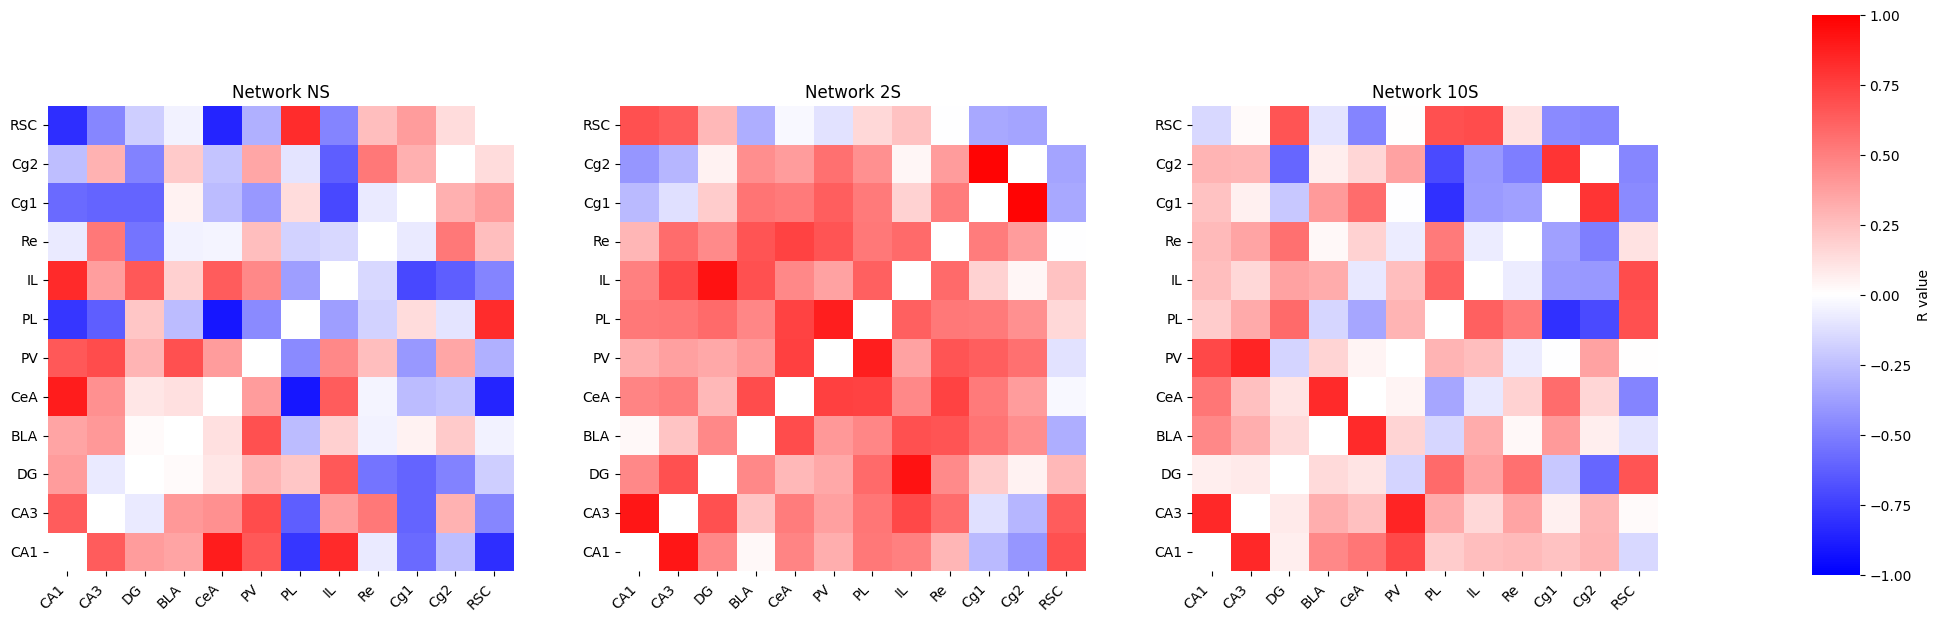

In [17]:
plot_multi_corr_matrices(cmatrix_ns_unthresh, cmatrix_2s_unthresh, cmatrix_10s_unthresh)


##### Fig 4 from the paper

![Fig4](Fig4.png)


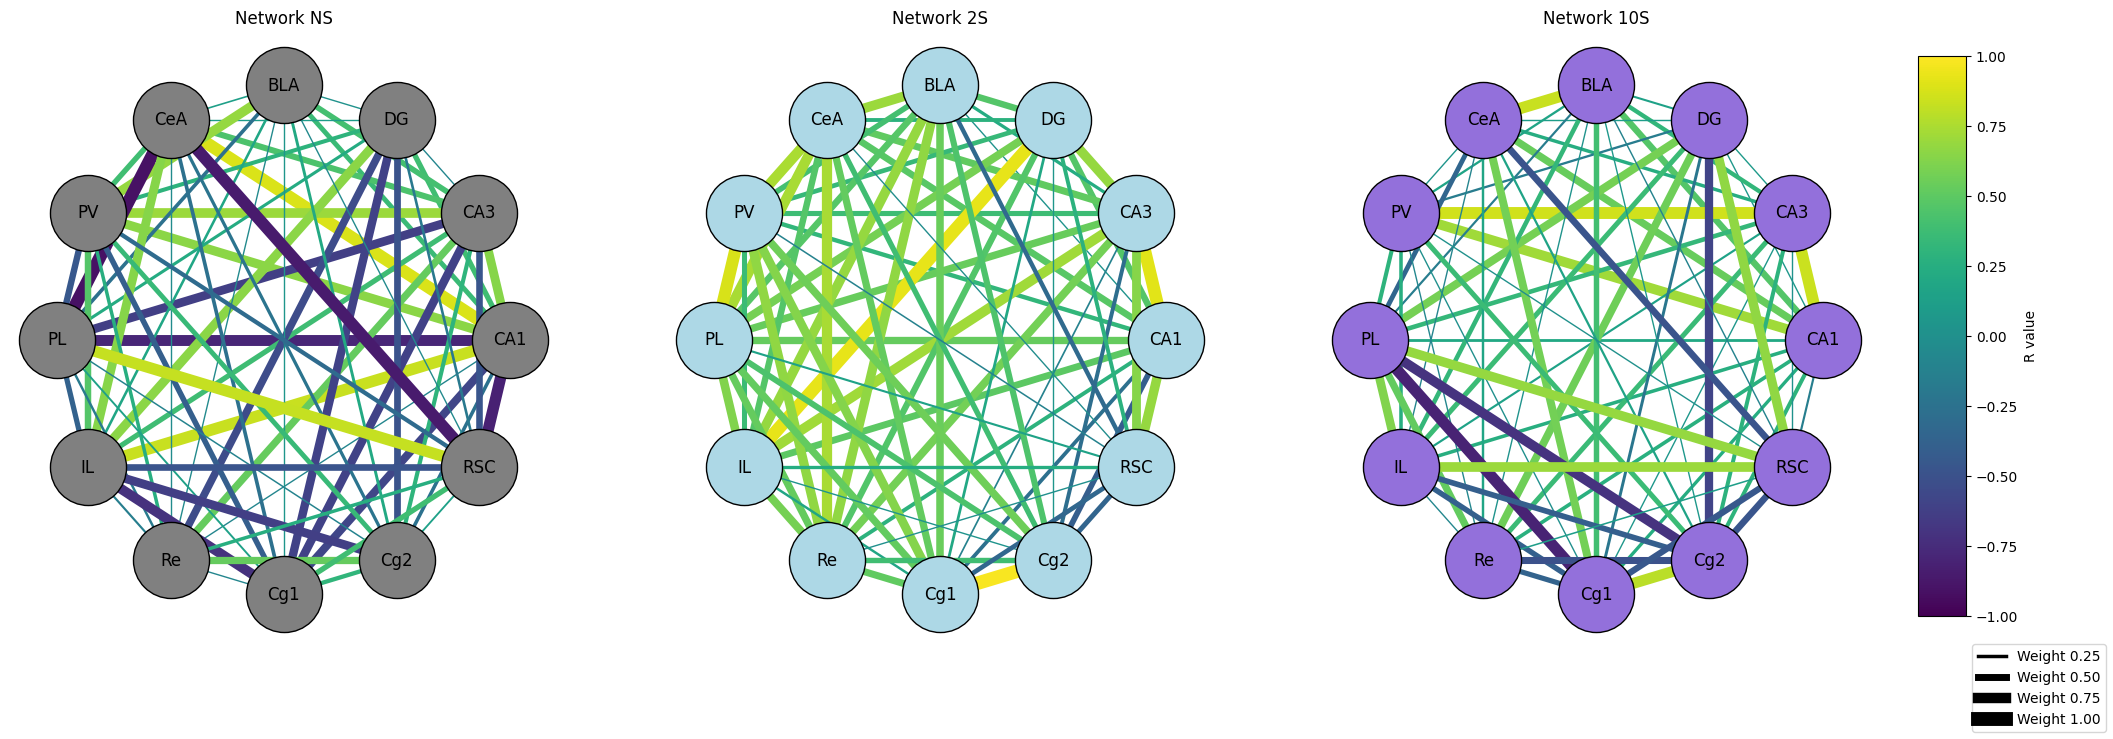

In [18]:
corr_matrices = [cmatrix_ns_unthresh, cmatrix_2s_unthresh, cmatrix_10s_unthresh]
titles = ['Network NS', 'Network 2S', 'Network 10S']
colors = ['grey', 'lightblue', 'mediumpurple']

plot_circular_networks(corr_matrices, titles, colors)

c:\Users\tyler\Anaconda3\envs\brain_segmentations\lib\site-packages\scipy\stats\_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\Users\tyler\Anaconda3\envs\brain_segmentations\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\tyler\Anaconda3\envs\brain_segmentations\lib\site-packages\scipy\stats\_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\Users\tyler\Anaconda3\envs\brain_segmentations\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal a

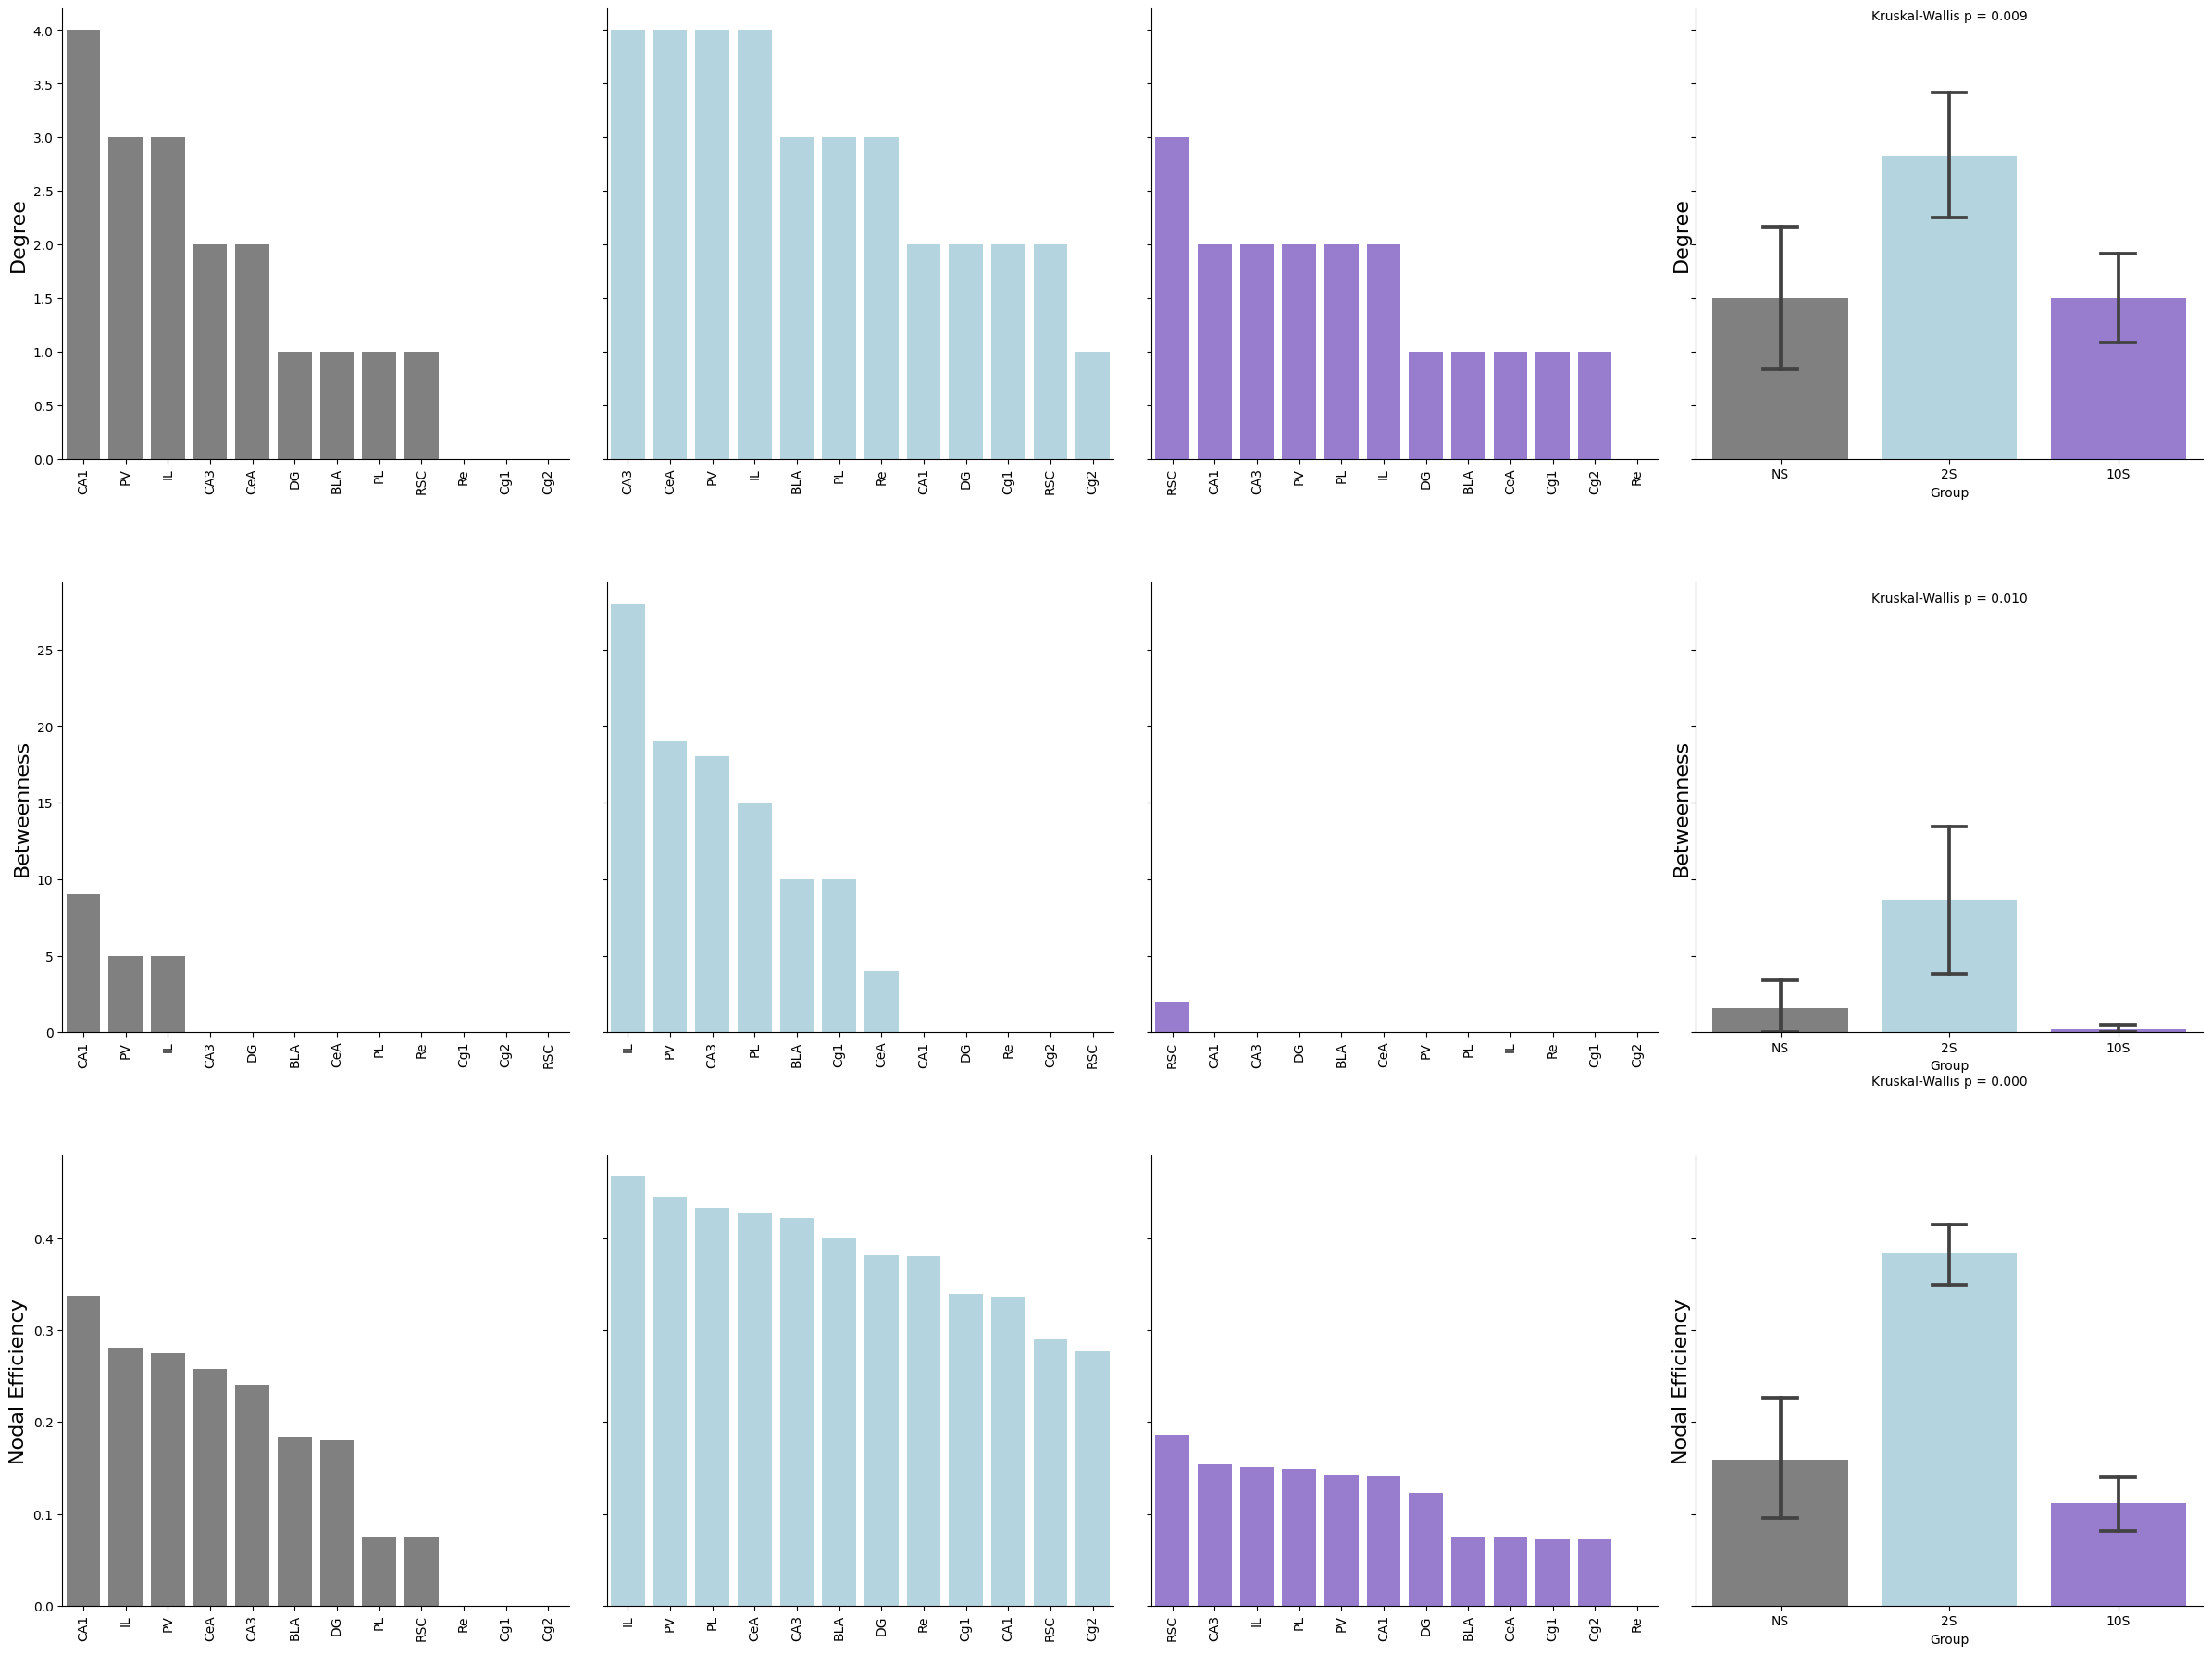

In [19]:
palette = {'NS': 'grey', '2S': 'lightblue', '10S': 'mediumpurple'}
create_subplot_figure(cent_ns, cent_2s, cent_10s, palette)


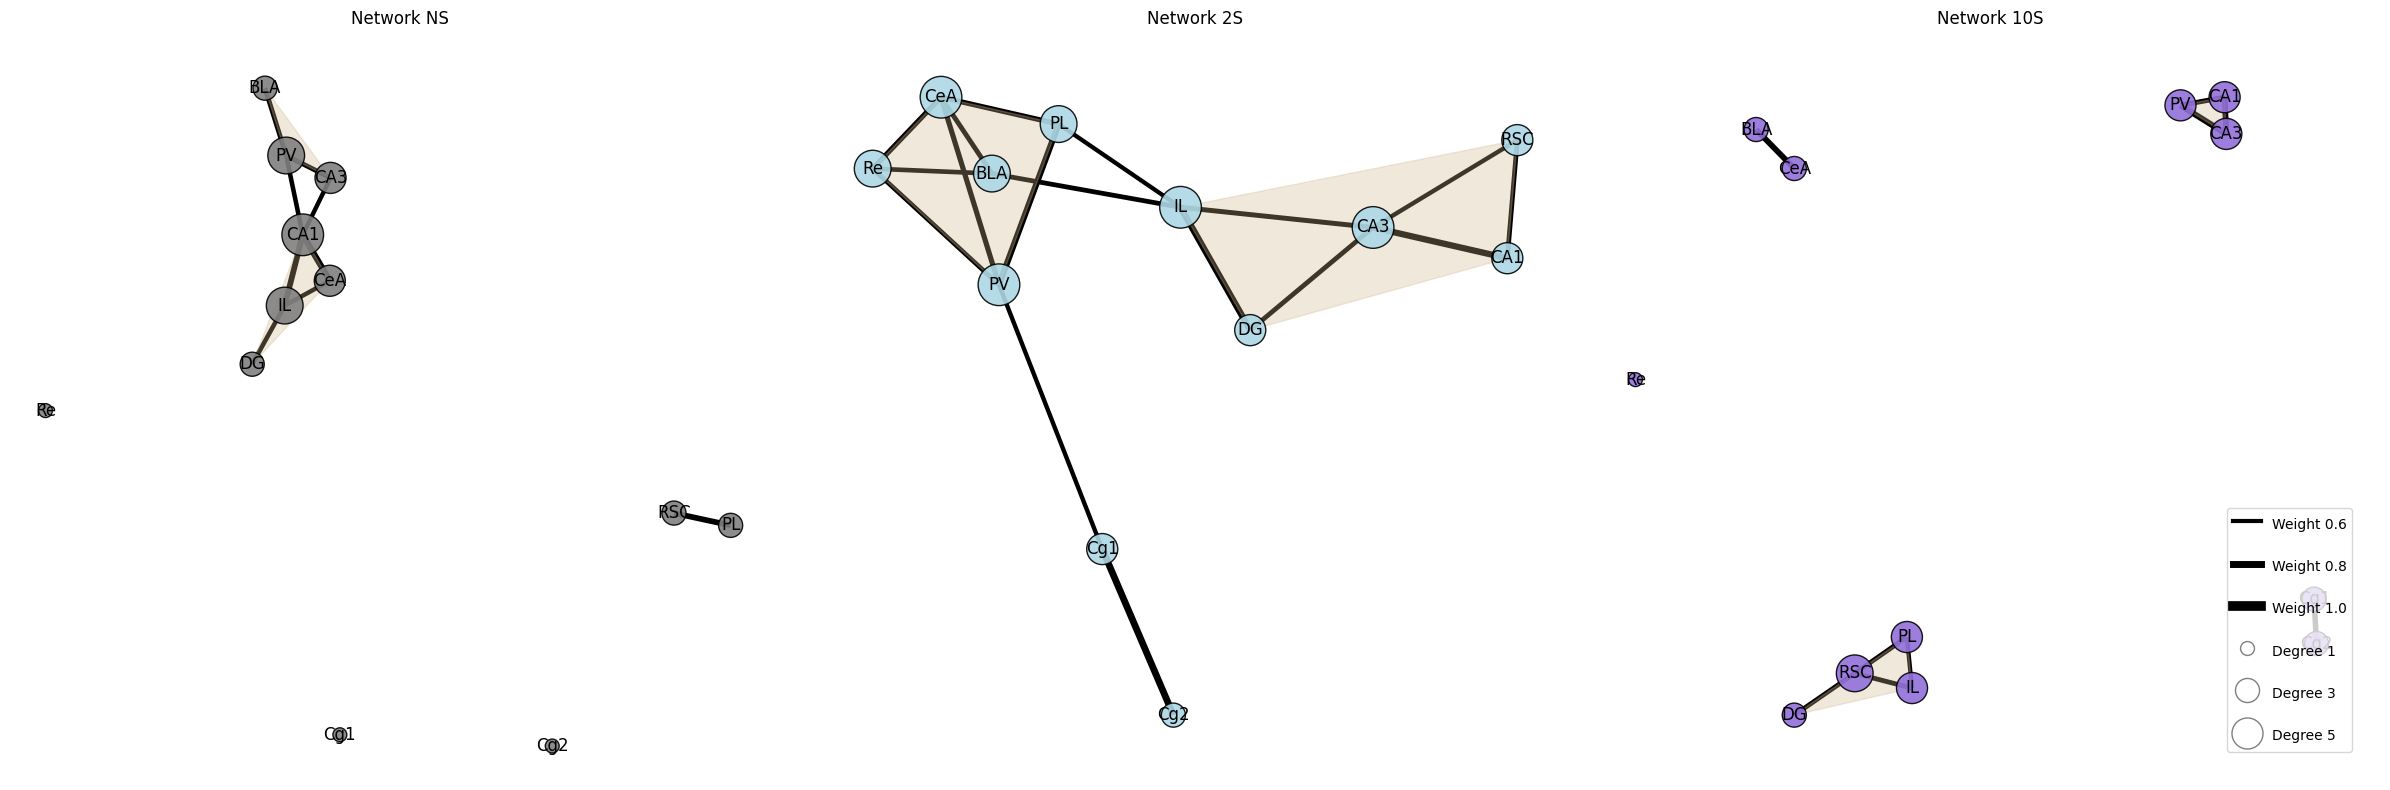

In [20]:
graphs = [G_ns, G_2s, G_10s]
titles = ['Network NS', 'Network 2S', 'Network 10S']
colors = ['grey', 'lightblue', 'mediumpurple']

layout = 'spring'
plot_multi_networks(graphs, titles, colors, layout)